In [1]:
import os, glob, shutil
import pandas as pd
import numpy as np
import csv
import pandas as pd


In [2]:
src= os.path.expanduser(r"C:\git\neal\PipeDream\benchmarking\queries")
os.path.exists(src)

True

In [3]:
query = 2

counts = pd.read_csv(os.path.join(src, "line_count.csv"), header=None)
input_times = pd.read_csv(os.path.join(src, "fpga_input_times.csv"), header=None)
proc_times = pd.read_csv(os.path.join(src, f"fpga_proc_times_q{query}.csv"), header=None) / 1000000
save_times = os.path.join(src, f"fpga_taxi_q{query}.csv")

In [4]:
df = pd.read_csv(os.path.join(src, "fpga_taxi_template.csv"), header=None)

columns = ["time", "total", "size", "input_throughput", "process_throughput", "input_time", "process_time"]
columns = {i: v for i, v in enumerate(columns)}

df = df.rename(columns = columns)

In [5]:
df['total'] = counts[0]
df['input_time'] = input_times[0]
df['process_time'] = proc_times[0]
df['input_throughput'] = df['total'] / df['input_time']
df['process_throughput'] = df['total'] / df['process_time']

In [6]:
df

,time,total,size,input_throughput,process_throughput,input_time,process_time
0,2020-05-07T02:45:07.525Z,14092413,98,1.008073e+06,1.498436e+07,13.979560,0.940475
1,2020-05-07T02:45:17.757Z,13380122,98,1.021916e+06,1.498245e+07,13.093169,0.893053
2,2020-05-07T02:45:25.482Z,14387371,98,1.020568e+06,1.488521e+07,14.097414,0.966555
3,2020-05-07T02:45:29.054Z,14294783,98,9.021051e+05,1.462753e+07,15.846028,0.977252
4,2020-05-07T02:45:35.481Z,14796312,98,9.922677e+05,1.465451e+07,14.911613,1.009676
...,...,...,...,...,...,...,...
77,2020-05-07T02:50:21.053Z,6073357,98,1.019814e+06,2.725884e+05,5.955355,22.280323
78,2020-05-07T02:50:28.426Z,6567787,98,1.476352e+07,2.777633e+05,0.444866,23.645268
79,2020-05-07T02:50:35.988Z,7213889,98,9.544614e+05,1.378436e+05,7.558073,52.333855
80,2020-05-07T02:50:43.080Z,6878111,98,1.467562e+07,2.787216e+05,0.468676,24.677348


In [11]:
df['process_throughput'].max() * 98 / 1024 / 1024

37.58087687091012

In [7]:
df.to_csv(save_times, header=None, index=False)

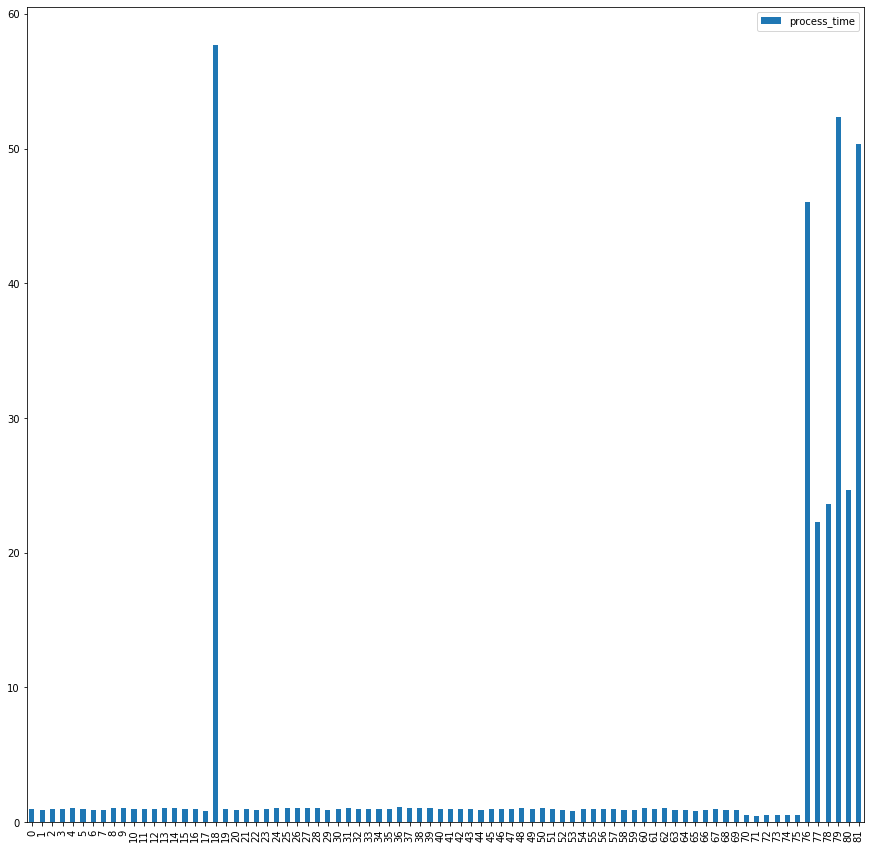

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15)
_=df.plot.bar(y='process_time')

In [24]:
#orig_data_path="/data/home/boris/yellow/taxi_data/"
src="/home/boris/data/taxi_data_cleaned_18_standard"
dest="/home/boris/data/taxi_data_18"
files = glob.glob(os.path.join(src, "*.csv"))

len(files)

0

In [3]:
fn = "yellow_tripdata_2014-03.csv"

srcfl = os.path.join(src, fn)
destfl = os.path.join(dest, fn)

In [10]:
def num_cols(srcfl):
    with open(srcfl, "r") as fd:
        csvreader = csv.reader(fd)
        for row in csvreader:
            return len(row)


In [15]:
lngths = dict(zip(files, map(num_cols, files)))

In [21]:
fltrd = {k: v for k, v in lngths.items() if v == 18}

In [25]:
len(fltrd)

82

In [27]:
if not os.path.exists(dest): os.makedirs(dest)
for f in fltrd.keys():
    destfl = os.path.join(dest, os.path.split(f)[1])
    shutil.move(f, destfl)

In [3]:
with open(files[0], "r") as fd:
    lines = fd.readlines()
avg_lngths = np.mean([len(l) for l in lines])

In [4]:
avg_lngths

97.9367625610517